# **EDA (Exploratory Data Analysis)**



*  Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.




**Steps involved in EDA**

1.Describing the data

2.Data cleaning

3.Imputation techniques

4.Data analysis and visualization

5.Transformations

6.Auto EDA


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/data_clean.csv')
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [ ]:
df = pd.read_csv('data_clean.csv', index_col=0)
df.head()

#change the first column to index col since there is 2 s.nos

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [ ]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [ ]:
#Draw inferences from the info.

#There are null values present in Ozone, Solar and Weather columns.
#Temp C and Month columns have numerical data but info method is giving as object.

In [ ]:
df.head(2)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C


# **Data type conversion**

**There are 2 ways by which we can convert the data type of these 2 columns**

By using replace method.

By using pandas built in functions.

In [ ]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

In [ ]:
df['Temp C'].value_counts()

81    11
76    10
82     9
77     8
86     7
78     6
79     6
67     5
73     5
75     5
80     5
92     5
87     5
85     5
84     5
83     4
68     4
57     3
71     3
72     3
69     3
61     3
74     3
90     3
93     3
66     3
88     3
94     2
91     2
89     2
70     2
62     2
64     2
65     2
59     2
58     2
97     1
C      1
96     1
63     1
56     1
Name: Temp C, dtype: int64

In [ ]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [ ]:
df['Month'].replace('May','5',inplace=True)

#here this object/function supports inplace, so changes will be made permanent else we have to pass this code to the same class

In [ ]:
df['Month'].dtype

dtype('O')

In [ ]:
#data type will still be obj, convert it to numeric

In [ ]:
df['Month'] = df['Month'].astype(int)

#we have to pass this code to the same class to make the changes permanent or it will make only temp changes

In [ ]:
df['Month'].dtype

dtype('int64')

In [ ]:
df['Month'].unique()

array([5, 6, 7, 8, 9])

In [ ]:
df['Temp C'] = pd.to_numeric[df['Temp C']]

KeyError: ignored

In [ ]:
#above error is cuz the data type is obj since there is a str value present. 
#So, 'to_numeric' supports some conversion like we can decide what to do to the errors
#Errors: - 'raise'-will raise error like above by default, 'coerce'- converts invalid data to NaN, 'ignore' - will ignore the error and convert    

In [ ]:
df['Temp C'] = pd.to_numeric(df['Temp C'], errors = 'coerce')

In [ ]:
df['Temp C'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   157 non-null    float64
 4   Month    158 non-null    int64  
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 12.3+ KB


# **Duplicates**

In [ ]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157    False
158     True
Length: 158, dtype: bool

In [ ]:
#Print the duplicated values

In [ ]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
158,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [ ]:
#Get all the duplicate values.
#2 Approaches
# - randomly filtering 2 or 3 columns to get the duplicate rows
# - keep = false -> marks duplicates

In [ ]:
df[(df['Ozone'] == 14.0) & (df['Wind'] == 14.3)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,75.0,9,28,2010,75,S
158,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [ ]:
df[df.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,75.0,9,28,2010,75,S
158,14.0,191.0,14.3,75.0,9,28,2010,75,S


In [ ]:
#Drop duplicate values

In [ ]:
df.drop_duplicates()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5,1,2010,67,S
2,36.0,118.0,8.0,72.0,5,2,2010,72,C
3,12.0,149.0,12.6,74.0,5,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5,4,2010,62,S
5,NaN,NaN,14.3,56.0,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68.0,9,30,2010,68,S
154,41.0,190.0,7.4,67.0,5,1,2010,67,C
155,30.0,193.0,6.9,70.0,9,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9,27,2010,77,S


In [ ]:
df.duplicated().sum()

1

In [ ]:
#To Make the changes permanent

df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# now temp C and temp both are having the same data in both the columns, so we can drop one

In [ ]:
df.drop(columns =['Temp C'], inplace=True)

In [ ]:
df.head(5)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S


# **Rename the column**

In [ ]:
df.rename(columns={'Solar.R':'Solar', 'Temp': 'Temperature'}, inplace=True)
df.head(2)

,Ozone,Solar,Wind,Month,Day,Year,Temperature,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C


# **Missing value imputation**


*   In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
*   Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

*   If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
*   Handling missing values is a crucial step in EDA.






In [ ]:
#Checking null values

In [ ]:
df.isna()

,Ozone,Solar,Wind,Month,Day,Year,Temperature,Weather
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False
156,True,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Year            0
Temperature     0
Weather         3
dtype: int64

In [ ]:
#Visualize the missing values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100

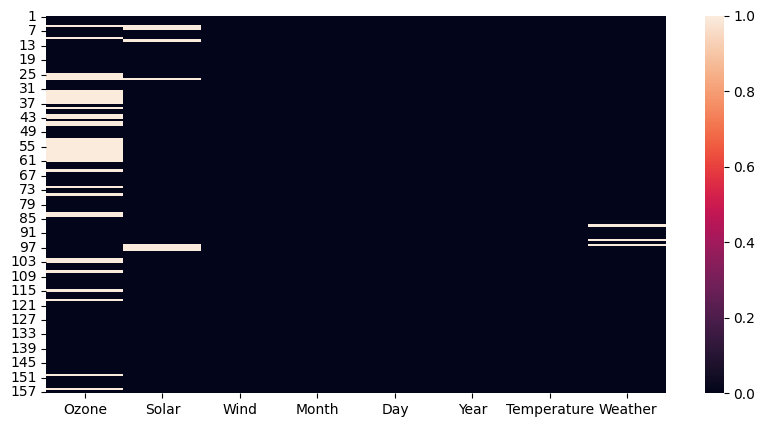

In [ ]:
sns.heatmap(df.isna())

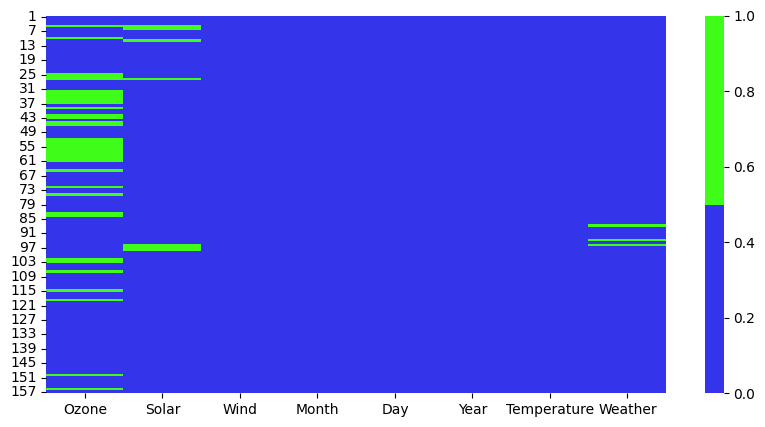

In [ ]:
sns.heatmap(df.isna(), cmap=['#3434eb','#3ffc19'])

# **Rules for missing value imputation:**


1.   If the null values are less than 3%, Use dropna() - drop those rows
2.   If the null values are between 5 to 40%, use fillna() - fill with mean median or mode

1.   If the null values are greater than 50%, drop the entire column.






In [ ]:
## Caluculate the percentage of missing values

In [ ]:
len(df)

157

In [ ]:
len(df[df['Ozone'].isnull()])

38

In [ ]:
per = (len(df[df['Ozone'].isnull()])/len(df))*100
per

24.203821656050955

In [ ]:
38/157*100

24.203821656050955

In [ ]:
# Its 24%, so 2nd rule, fill na -> since outliers can be thr we use median values in most cases

In [ ]:
ozone_median =  df['Ozone'].median
ozone_median

<bound method NDFrame._add_numeric_operations.<locals>.median of 1      41.0
2      36.0
3      12.0
4      18.0
5       NaN
       ... 
153    20.0
154    41.0
155    30.0
156     NaN
157    18.0
Name: Ozone, Length: 157, dtype: float64>

In [ ]:
df['Ozone'].fillna(ozone_median, inplace=True)

In [ ]:
df['Ozone'].isna().sum()

0

In [ ]:
df['Solar'].fillna(df['Solar'].median(), inplace=True)

In [ ]:
df['Solar'].isna().sum()

0

In [ ]:
df['Weather'].isna()

1      False
2      False
3      False
4      False
5      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Weather, Length: 157, dtype: bool

In [ ]:
df['Weather'].isna().sum()

3

In [ ]:
df[df['Weather'].isna()]

,Ozone,Solar,Wind,Month,Day,Year,Temperature,Weather
88,52.0,82.0,12.0,7,27,2010,86,NaN
94,9.0,24.0,13.8,8,2,2010,81,NaN
96,78.0,199.0,6.9,8,4,2010,86,NaN


In [ ]:
#Since weather is a categorical column, we replace with mode
df['Weather'].mode()

0    S
dtype: object

In [ ]:
df['Weather'].fillna(df['Weather'].mode, inplace=True)

In [ ]:
df.isnull().sum()

Ozone          0
Solar          0
Wind           0
Month          0
Day            0
Year           0
Temperature    0
Weather        0
dtype: int64

# **Outlier Detection**


*   Histogram

*   Boxplot
*   Descriptive stats for df





In [ ]:
df['Ozone'] = pd.to_numeric(df['Ozone'], errors='coerce')

In [ ]:
df['Ozone'].dtype

dtype('float64')

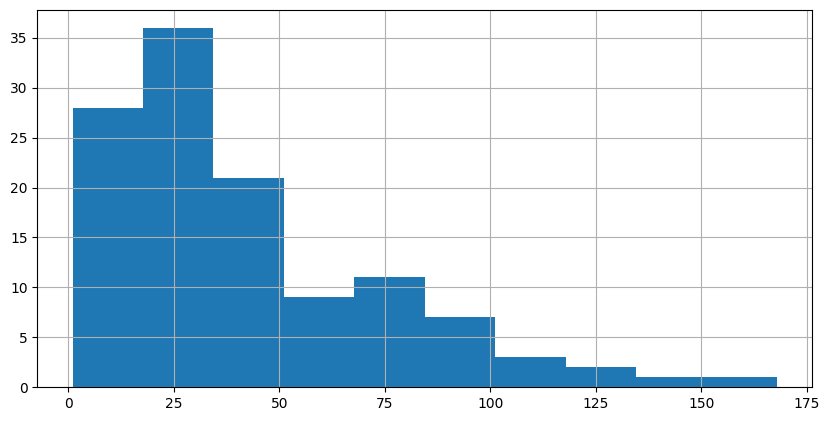

In [ ]:
plt.hist(df['Ozone'])
plt.grid()

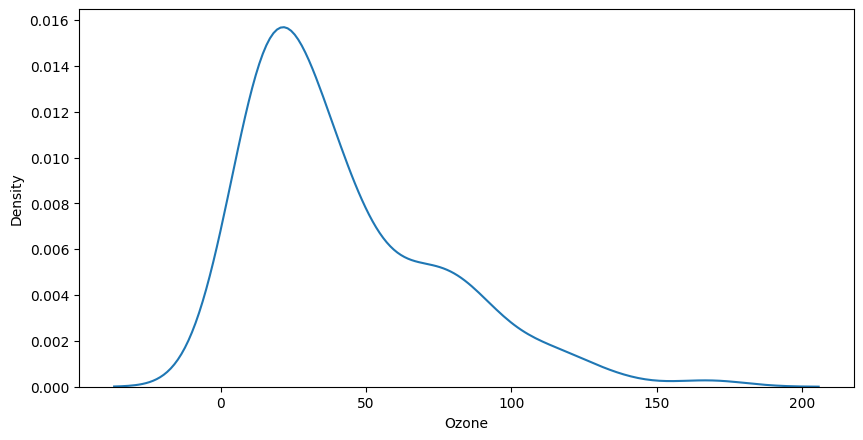

In [ ]:
sns.kdeplot(df['Ozone'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


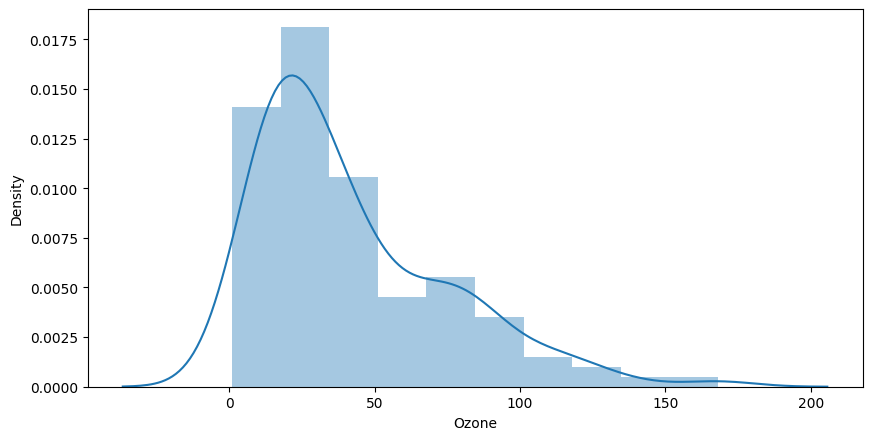

In [ ]:
sns.distplot(df['Ozone'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


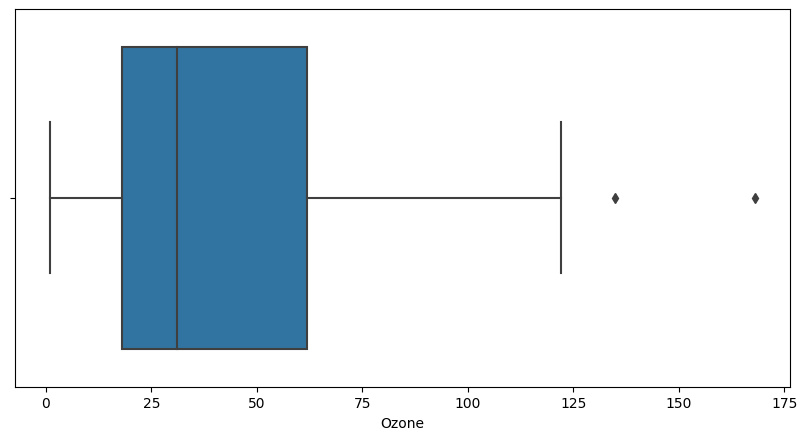

In [ ]:
sns.boxplot(df['Ozone'])

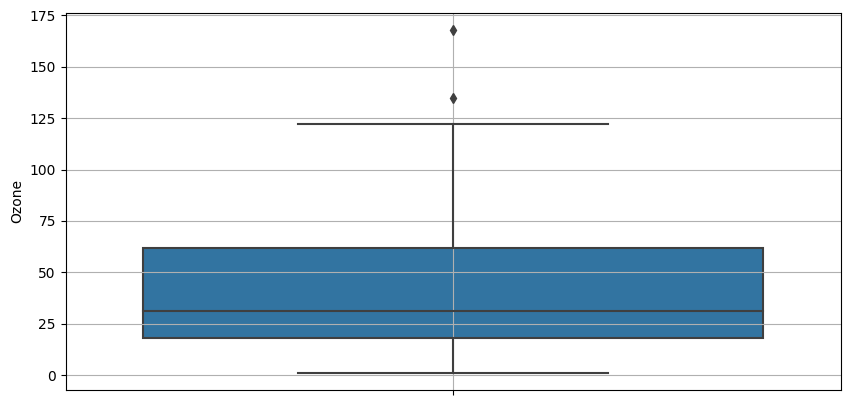

In [ ]:
sns.boxplot(y = df['Ozone'])
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6cf0e1cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6cf0dac3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6cf0e1c940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6cf0daca60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6cf0dacd60>],
 'means': []}

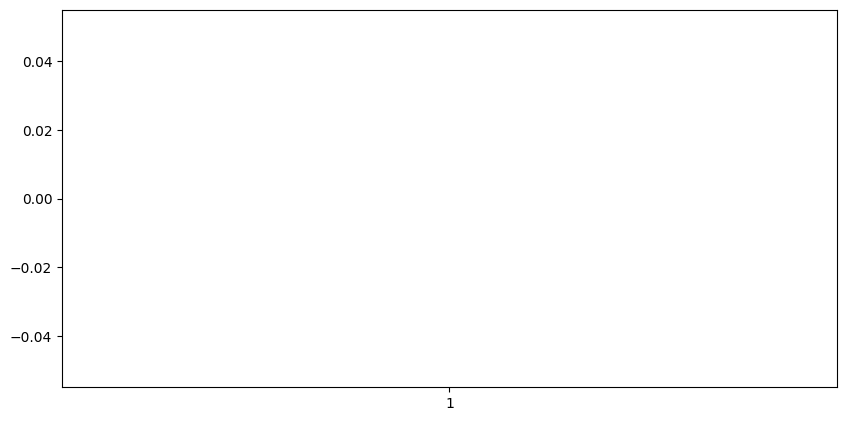

In [ ]:
plt.boxplot(df['Ozone'], showmeans=True,vert=False)

#show means will show the mean value, vert is for orientation horz = false or vertical = true

# **Scatter Plot and Correlation**

In [ ]:
df.head()

,Ozone,Solar,Wind,Month,Day,Year,Temperature,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,199.0,14.3,5,5,2010,56,S


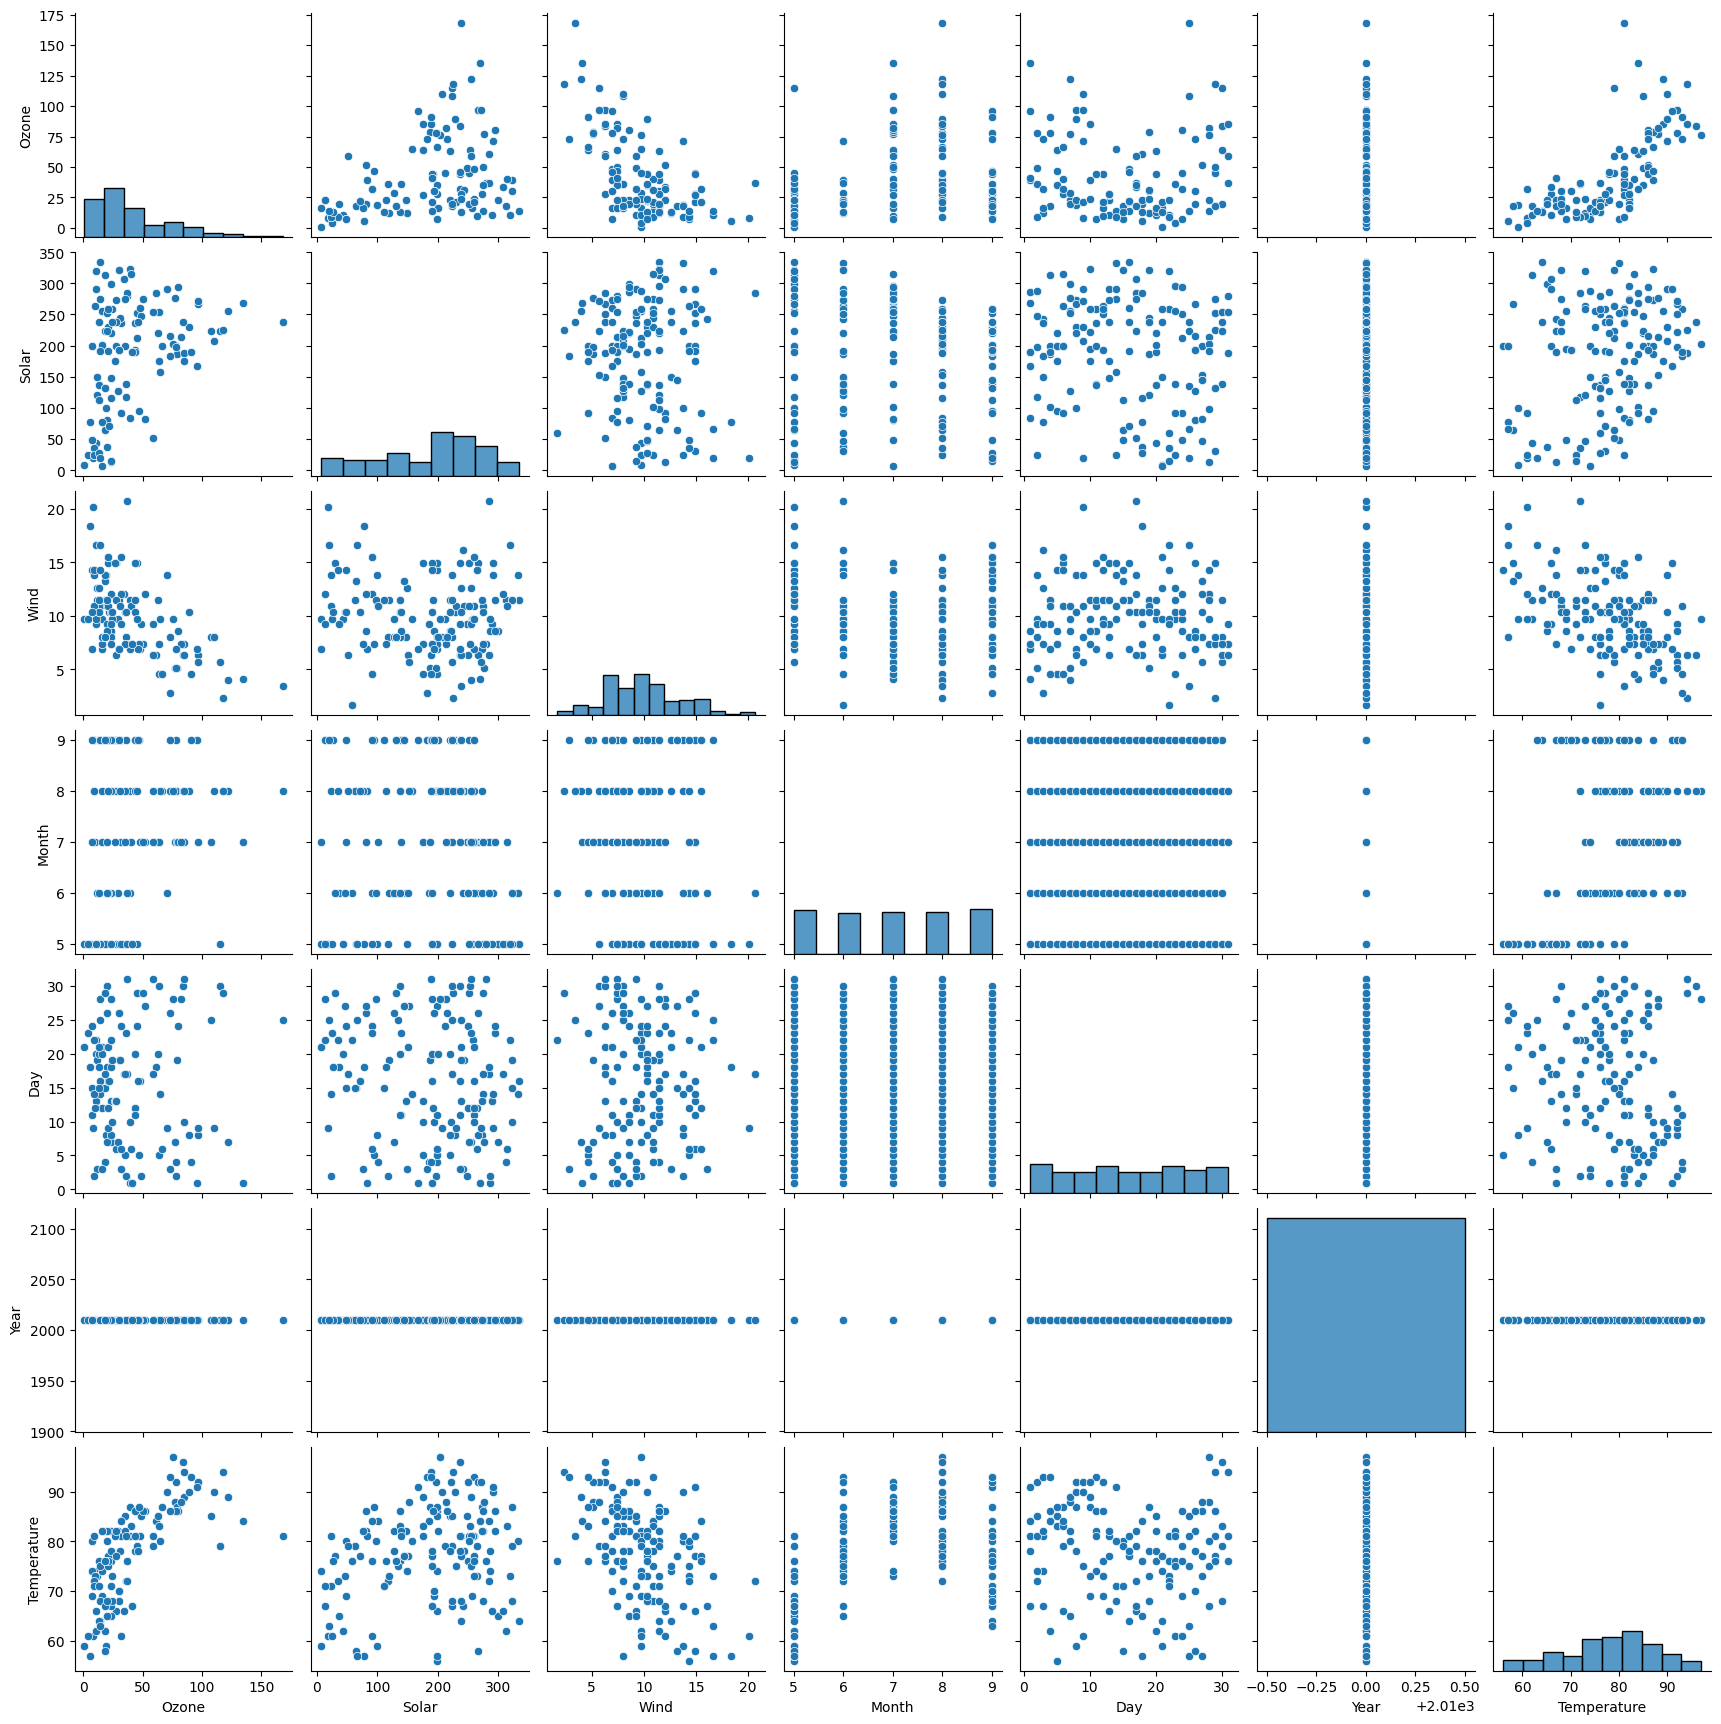

In [ ]:
sns.pairplot(df)

#we can check the correlation b/w each and every columns comparison

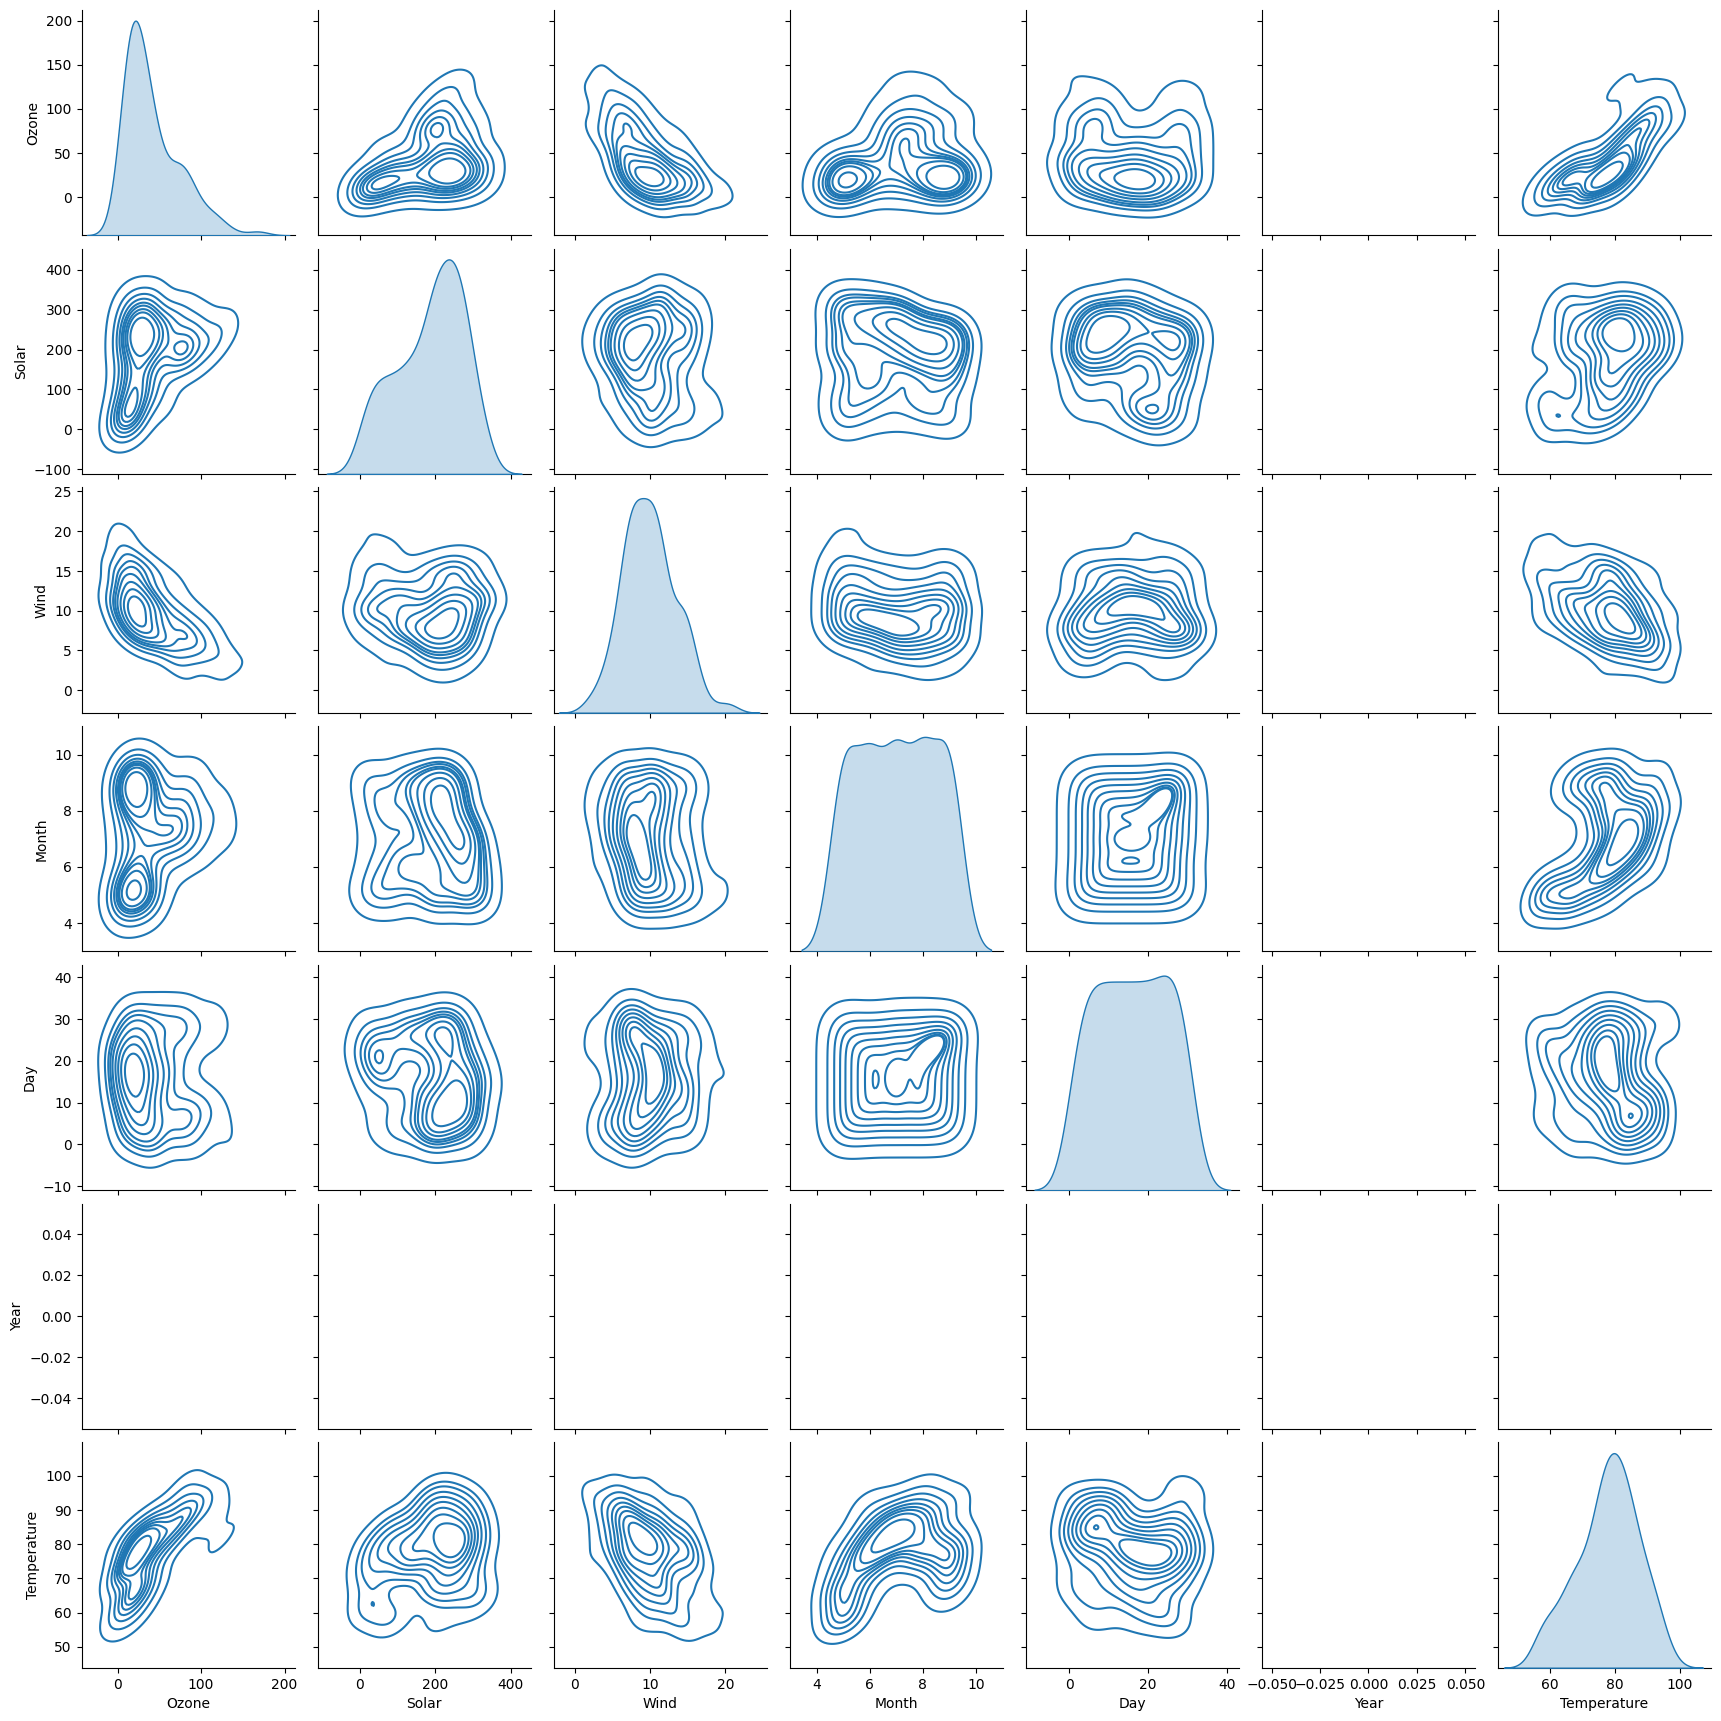

In [ ]:
# if we want that line, we can use kde plot to see the distribution
sns.pairplot(df,kind='kde')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


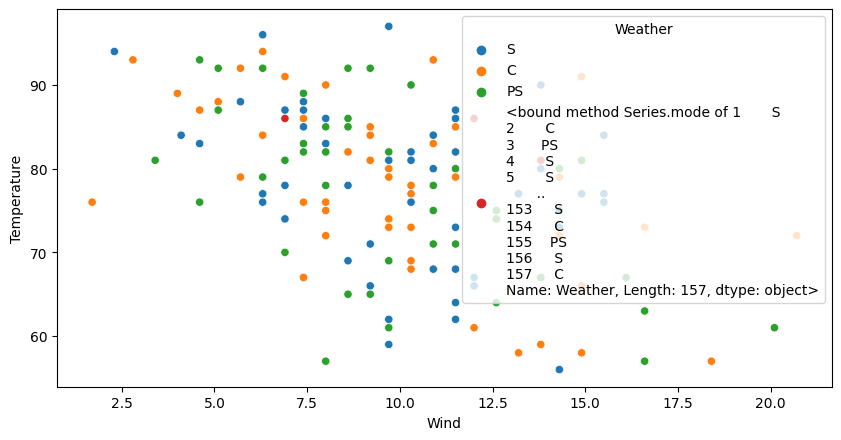

In [ ]:
sns.scatterplot(df['Wind'], df['Temperature'], hue=df['Weather'])


In [ ]:
# If we want interactive graphs we can use plotly

import plotly.express as pe
pe.scatter(df['Ozone'], df['Wind'])

In [ ]:
# we can also plot 3D Plots

pe.scatter_3d(x = 'Ozone',y = 'Wind',z = 'Temperature', data_frame = df,color='Weather')

In [ ]:
pe.histogram(df['Ozone'])

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 2010.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 2010.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 2010.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


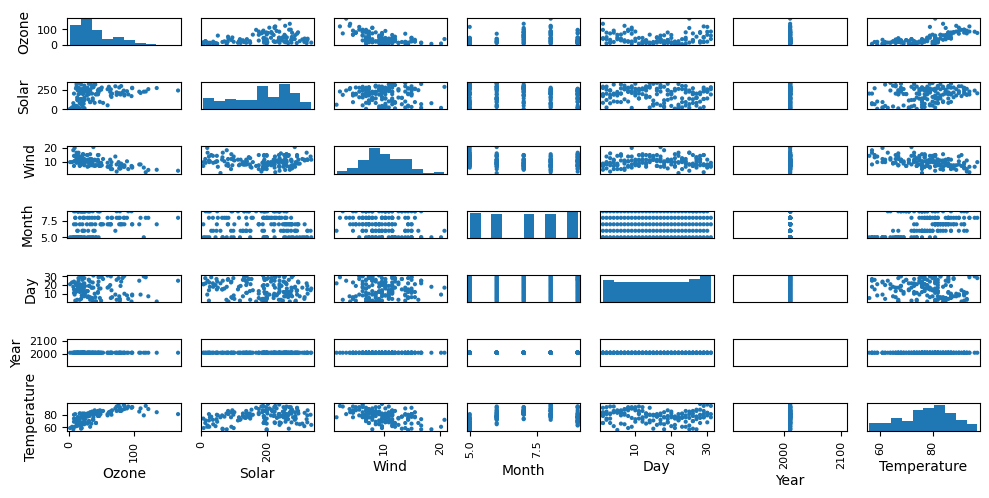

In [ ]:
pd.plotting.scatter_matrix(df,alpha=1)
plt.tight_layout()

In [ ]:
#Correlation coefficient
# this gives by default pearsons coffecient

df.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temperature
Ozone,1.000000,0.345610,-0.590270,0.149594,-0.025465,NaN,0.694404
Solar,0.345610,1.000000,-0.057709,-0.083788,-0.156243,NaN,0.256994
Wind,-0.590270,-0.057709,1.000000,-0.170328,0.029900,NaN,-0.441228
Month,0.149594,-0.083788,-0.170328,1.000000,0.041438,NaN,0.408060
Day,-0.025465,-0.156243,0.029900,0.041438,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.694404,0.256994,-0.441228,0.408060,-0.122787,NaN,1.000000


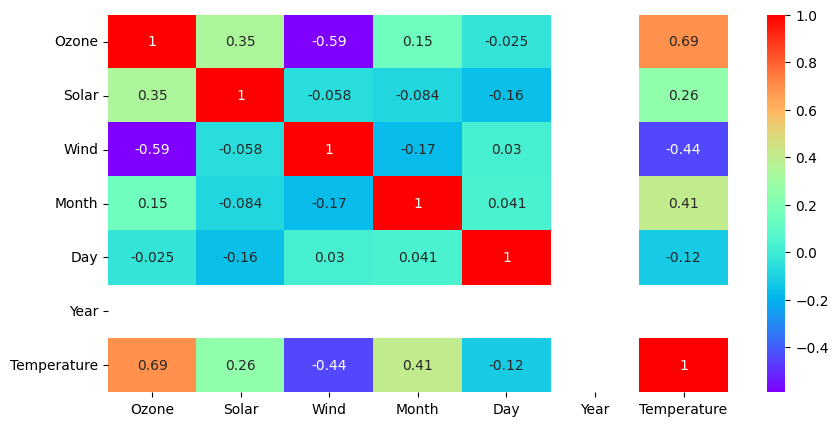

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

# **Transformation**


*  Machines do not understand words and sentences.

*   Machines only understand numbers.
*  Before model building, we have convert all the categorical columns into numerical.




In [ ]:
#Encoding using pandas dummy function.

df = pd.get_dummies(df, columns=['Weather'])
df

,Ozone,Solar,Wind,Month,Day,Year,Temperature,"Weather_<bound method Series.mode of 1 S\n2 C\n3 PS\n4 S\n5 S\n ..\n153 S\n154 C\n155 PS\n156 S\n157 C\nName: Weather, Length: 157, dtype: object>",Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5,1,2010,67,0,0,0,1
2,36.0,118.0,8.0,5,2,2010,72,0,1,0,0
3,12.0,149.0,12.6,5,3,2010,74,0,0,1,0
4,18.0,313.0,11.5,5,4,2010,62,0,0,0,1
5,NaN,199.0,14.3,5,5,2010,56,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,2010,68,0,0,0,1
154,41.0,190.0,7.4,5,1,2010,67,0,1,0,0
155,30.0,193.0,6.9,9,26,2010,70,0,0,1,0
156,NaN,145.0,13.2,9,27,2010,77,0,0,0,1


# **Scaling the data**


1.  Normalization

*  Scales value within the range of 0 to 1.



2.   Standardization

*   Uses Z score for scaling.
*   Scale values in such a way that the mean = 0 and standard deviation is 1.






In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
#to convert to scaled down normal curve data points, each column will get scaled down to its z score so that evey column will have equal importance

sc.fit_transform(df)


array([[-0.02506404,  0.04639404, -0.72407878, ..., -0.67357531,
        -0.65366102,  1.30648251],
       [-0.17880737, -0.78341331, -0.55235617, ...,  1.48461498,
        -0.65366102, -0.765414  ],
       [-0.91677536, -0.42613514,  0.76418385, ..., -0.67357531,
         1.52984494, -0.765414  ],
       ...,
       [-0.36329937,  0.08096935, -0.86718096, ..., -0.67357531,
         1.52984494, -0.765414  ],
       [        nan, -0.47223555,  0.93590646, ..., -0.67357531,
        -0.65366102,  1.30648251],
       [-0.73228336, -0.63358698, -0.55235617, ...,  1.48461498,
        -0.65366102, -0.765414  ]])

In [ ]:
# to convert to data frame
scaled_df  = pd.DataFrame(sc.fit_transform(df))
scaled_df

,0,1,2,3,4,5,6,7,8,9,10
0,-0.025064,0.046394,-0.724079,-1.412198,-1.668937,0.0,-1.146116,-0.139573,-0.673575,-0.653661,1.306483
1,-0.178807,-0.783413,-0.552356,-1.412198,-1.557152,0.0,-0.612802,-0.139573,1.484615,-0.653661,-0.765414
2,-0.916775,-0.426135,0.764184,-1.412198,-1.445367,0.0,-0.399476,-0.139573,-0.673575,1.529845,-0.765414
3,-0.732283,1.463982,0.449359,-1.412198,-1.333583,0.0,-1.679431,-0.139573,-0.673575,-0.653661,1.306483
4,NaN,0.150120,1.250731,-1.412198,-1.221798,0.0,-2.319408,-0.139573,-0.673575,-0.653661,1.306483
...,...,...,...,...,...,...,...,...,...,...,...
152,-0.670786,0.426722,0.449359,1.385469,1.572816,0.0,-1.039454,-0.139573,-0.673575,-0.653661,1.306483
153,-0.025064,0.046394,-0.724079,-1.412198,-1.668937,0.0,-1.146116,-0.139573,1.484615,-0.653661,-0.765414
154,-0.363299,0.080969,-0.867181,1.385469,1.125678,0.0,-0.826128,-0.139573,-0.673575,1.529845,-0.765414
155,NaN,-0.472236,0.935906,1.385469,1.237462,0.0,-0.079488,-0.139573,-0.673575,-0.653661,1.306483


In [ ]:
#For showing the columns as well
scaled_df  = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
scaled_df

,Ozone,Solar,Wind,Month,Day,Year,Temperature,"Weather_<bound method Series.mode of 1 S\n2 C\n3 PS\n4 S\n5 S\n ..\n153 S\n154 C\n155 PS\n156 S\n157 C\nName: Weather, Length: 157, dtype: object>",Weather_C,Weather_PS,Weather_S
0,-0.025064,0.046394,-0.724079,-1.412198,-1.668937,0.0,-1.146116,-0.139573,-0.673575,-0.653661,1.306483
1,-0.178807,-0.783413,-0.552356,-1.412198,-1.557152,0.0,-0.612802,-0.139573,1.484615,-0.653661,-0.765414
2,-0.916775,-0.426135,0.764184,-1.412198,-1.445367,0.0,-0.399476,-0.139573,-0.673575,1.529845,-0.765414
3,-0.732283,1.463982,0.449359,-1.412198,-1.333583,0.0,-1.679431,-0.139573,-0.673575,-0.653661,1.306483
4,NaN,0.150120,1.250731,-1.412198,-1.221798,0.0,-2.319408,-0.139573,-0.673575,-0.653661,1.306483
...,...,...,...,...,...,...,...,...,...,...,...
152,-0.670786,0.426722,0.449359,1.385469,1.572816,0.0,-1.039454,-0.139573,-0.673575,-0.653661,1.306483
153,-0.025064,0.046394,-0.724079,-1.412198,-1.668937,0.0,-1.146116,-0.139573,1.484615,-0.653661,-0.765414
154,-0.363299,0.080969,-0.867181,1.385469,1.125678,0.0,-0.826128,-0.139573,-0.673575,1.529845,-0.765414
155,NaN,-0.472236,0.935906,1.385469,1.237462,0.0,-0.079488,-0.139573,-0.673575,-0.653661,1.306483


In [ ]:
scaled_df['Ozone'].mean()

0.0

In [ ]:
scaled_df['Ozone'].std()

1.0042283486693584

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mn = MinMaxScaler()

In [ ]:
minmax = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax

,Ozone,Solar,Wind,Month,Day,Year,Temperature,"Weather_<bound method Series.mode of 1 S\n2 C\n3 PS\n4 S\n5 S\n ..\n153 S\n154 C\n155 PS\n156 S\n157 C\nName: Weather, Length: 157, dtype: object>",Weather_C,Weather_PS,Weather_S
0,0.239521,0.559633,0.300000,0.0,0.000000,0.0,0.268293,0.0,0.0,0.0,1.0
1,0.209581,0.339450,0.331579,0.0,0.033333,0.0,0.390244,0.0,1.0,0.0,0.0
2,0.065868,0.434251,0.573684,0.0,0.066667,0.0,0.439024,0.0,0.0,1.0,0.0
3,0.101796,0.935780,0.515789,0.0,0.100000,0.0,0.146341,0.0,0.0,0.0,1.0
4,NaN,0.587156,0.663158,0.0,0.133333,0.0,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
152,0.113772,0.660550,0.515789,1.0,0.966667,0.0,0.292683,0.0,0.0,0.0,1.0
153,0.239521,0.559633,0.300000,0.0,0.000000,0.0,0.268293,0.0,1.0,0.0,0.0
154,0.173653,0.568807,0.273684,1.0,0.833333,0.0,0.341463,0.0,0.0,1.0,0.0
155,NaN,0.422018,0.605263,1.0,0.866667,0.0,0.512195,0.0,0.0,0.0,1.0


In [ ]:
minmax['Ozone'].max()

1.0000000000000002

In [ ]:
minmax['Ozone'].min()

0.0

# **Speed up the EDA process**

In [ ]:
!pip install pandas-profiling==3.1.0
!pip install sweetviz

In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
EDA_report= pp.ProfileReport(df, title="Pandas Profiling Report")
EDA_report

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# To save this pandas profiling
EDA_report.to_file(output_file='report2.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
sweet_report

In [ ]:
  sweet_report.show_html('weather_report.html')

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
